Alumno: Erick Salvador Alvarez Valencia

## Demostrar la ortogonalidad de la transformada de Fourier para señales en 2D

Tenemos un conjunto de señales armónicas relacionadas entre sí en un periodo de $N$ muestras: $$S_{n, m} = \{S_{n, m}^0, S_{n, m}^1, ..., S_{n, m}^{N - 1}\}$$

Para verificar la ortogonalidad de esos componentes realizamos el producto punto con los vectores:

$$<\vec{S_{m, n}}, \vec{S_{k, l}}> = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} S_{m, n}^{x, y} S_{k, l}^{x, y}$$
$$<\vec{S_{m, n}}, \vec{S_{k, l}}> = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} e^{-i2 \pi (\frac{nx}{N} + \frac{my}{M})} e^{i2 \pi (\frac{lx}{N} + \frac{kl}{M})}$$
$$<\vec{S_{m, n}}, \vec{S_{k, l}}> = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} e^{i2 \pi (-\frac{nx}{N} - \frac{my}{M} - \frac{xl}{N} - \frac{ky}{M})}$$
$$<\vec{S_{m, n}}, \vec{S_{k, l}}> = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} e^{i2 \pi (\frac{x (l - n)}{N})} e^{i2 \pi (\frac{y (k - m)}{M})}$$
$$<\vec{S_{m, n}}, \vec{S_{k, l}}> = \sum_{x = 0}^{N - 1} e^{i2 \pi (\frac{x (l - n)}{N})} \sum_{y = 0}^{M - 1} e^{i2 \pi (\frac{y (k - m)}{M})}$$

Hemos separado el producto anterior en un producto de sumas donde la primera depende sólo de $x$ y la segunda sólo de $y$. Ahora, tratamos estas sumas como series geométricas para ayudarnos a verificar la ortogonalidad.

$$\sum_{x = 0}^{N - 1} e^{i2 \pi (\frac{x (l - n)}{N})} \sum_{y = 0}^{M - 1} e^{i2 \pi (\frac{y (k - m)}{M})} = \frac{1 - a^N}{1 - a} \frac{1 - a^M}{1 - a}$$
$$\frac{1 - a^N}{1 - a} \frac{1 - a^M}{1 - a} = \frac{1 - e^{\frac{i2 \pi (l - n) N}{N}}}{1 - e^{\frac{i2 \pi (l - n)}{N}}} \frac{1 - e^{\frac{i2 \pi (k - m) M}{M}}}{1 - e^{\frac{i2 \pi (k - m)}{M}}} = \frac{1 - e^{i2 \pi (l - n)}}{1 - e^{\frac{i2 \pi (l - n)}{N}}} \frac{1 - e^{i2 \pi (k - m)}}{1 - e^{\frac{i2 \pi (k - m)}{M}}}$$

Del producto anterior podemos ver que tanto $e^{i2 \pi (l - n)}$ como $e^{i2 \pi (k - m)}$ se convierten en 1 por la identidad de Euler, y por lo tanto todo el producto se convierte en cero.

Para el caso donde los pares (\{m, n\}) = (\{k, l\}) son iguales, vemos el producto interno definido anteriormente se convierte en la norma al cuadrado de dichos vectores.

$$<\vec{S_{m, n}}, \vec{S_{m, n}}> = ||\vec{S^{x, y}}||_2^2 = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} e^{i2 \pi (\frac{x (n - n)}{N})} e^{i2 \pi (\frac{y (m - m)}{M})} = MN$$

Ahora, una vez que hemos demostrado la ortogonalidad de los conjuntos anteriores podemos definir la transformada discreta de Fourier para encontrar los coeficientes:

$$C_{n, m} = \frac{<\vec{f}, \vec{S^{x, y}}>}{||\vec{S^{x, y}}||_2^2} = \frac{\sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} f(x, y) e^{-i2 \pi (\frac{nx}{N} + \frac{my}{M})}}{M N}$$

Definimos $\vec{C} = ((C_{0, 0}, C_{0, 1}, ..., (C_{0, N - 1}), C_{1, 0}, C_{1, 1}, C_{1, N - 1}), ..., (C_{M - 1, 0}, C_{M - 1, 1}, ..., C_{M - 1, N - 1}))$ como la matriz de coeficientes obtenidos con la transformada de Fourier.

De la misma forma podemos definir la transformada inversa de Fourier en dos dimensiones para el caso discreto como:
$$f(x, y) = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} C_{x, y} e^{i2 \pi (\frac{nx}{N} + \frac{my}{M})}$$

Ahora, se hará la programación de la transformada y la transformada inversa de Fourier para una imagen. Lo primero que hacemos es tener nuestra imagen en escala de grises y tamaño (32x32).

Dimensión (px): (32, 32)


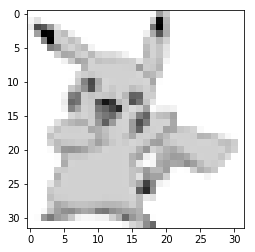

In [1]:
from math import *
import numpy as np
import skimage
from skimage import data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.color import rgb2grey

%matplotlib inline
img = mpimg.imread("Pikachu.png")
img = rgb2gray(img)
plt.imshow(img, cmap = "gray")
print("Dimensión (px): " + str(img.shape))

Ahora desarrollamos los métodos referentes a la transformada de Fourier ($\textit{transform}$) y la transformada inversa ($\textit{inverse_transform}$).

In [2]:
def transform(img, n, m):
    M = img.shape[0]
    N = img.shape[1]
    res = 0.0
    for y in range(M):
        for x in range(N):
            res += img[y][x] * np.exp(-2j * np.pi * ((float(n * x) / float(N)) + (float(m * y) / float(M))))
            
    res /= float(M * N)
    return res

def inverse_transform(img, n, m, do_plot = False):
    M, N = img.shape
    res = np.zeros((M, N), dtype = 'float')
    
    for i in range(n):
        for j in range(m):
            img_aux = np.zeros((M, N), dtype = 'float')
            c = transform(img, i, j)
            
            for y in range(M):
                for x in range(N):
                    img_aux[y][x] += c * np.exp(2j * np.pi * ((float(i * x) / float(N)) + (float(j * y) / float(M))))
                    
            if do_plot:
                plt.imshow(img_aux, cmap = "gray")
                plt.show()
            res += img_aux
            
    return res

Descomponemos la imagen anterior en imágenes generadas por los primeros 64 coeficientes (8x8).

/home/ericksav22/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


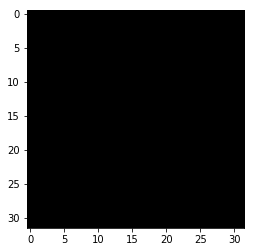

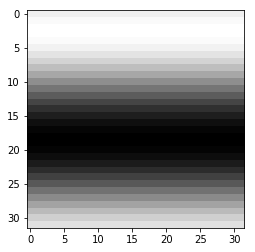

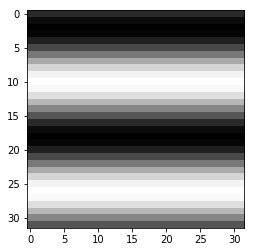

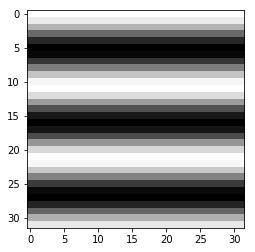

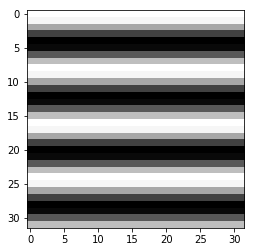

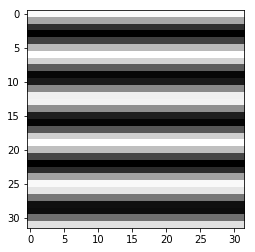

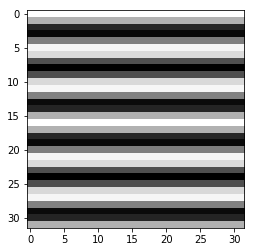

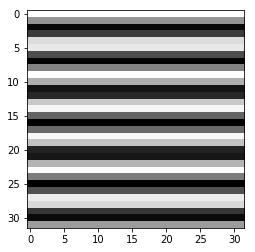

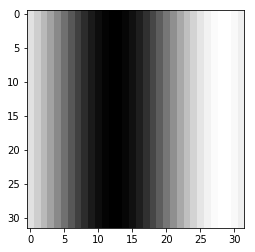

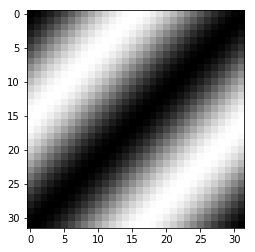

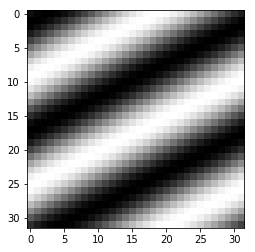

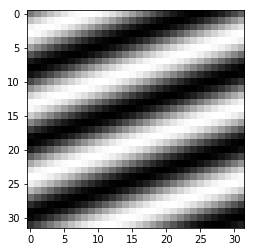

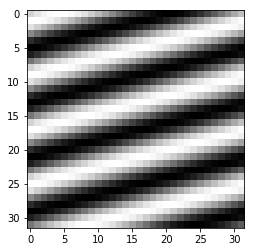

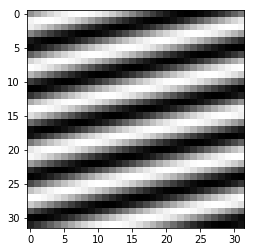

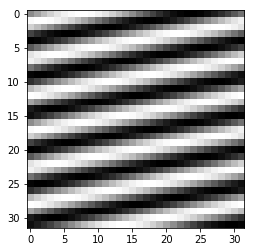

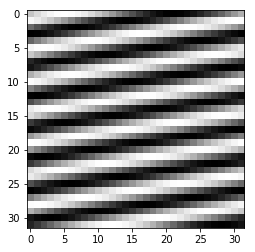

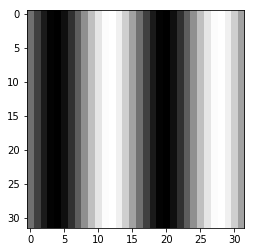

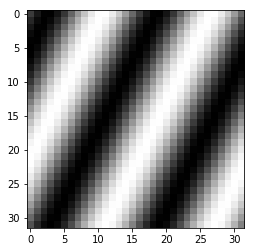

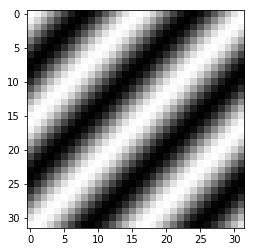

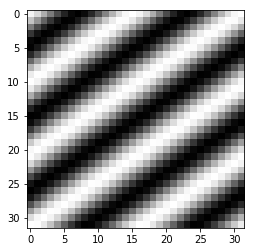

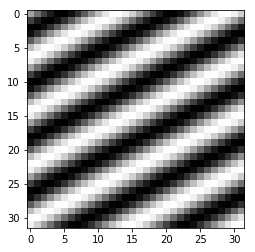

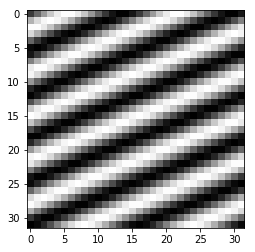

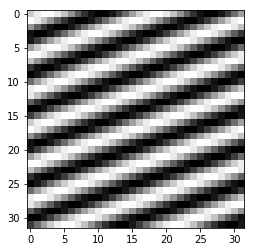

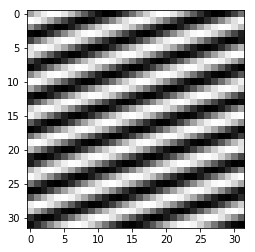

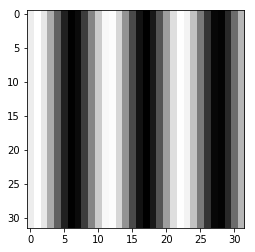

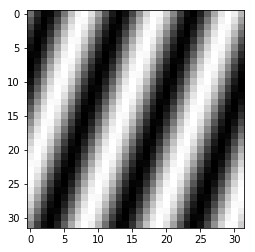

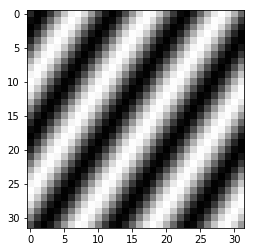

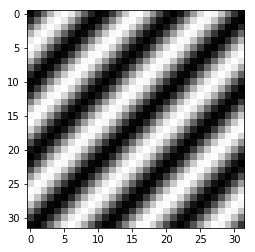

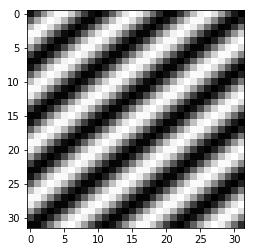

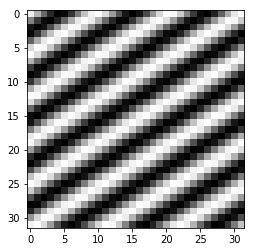

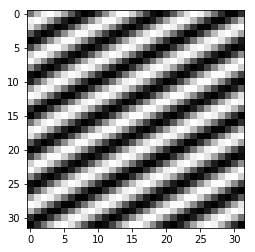

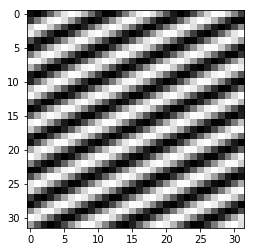

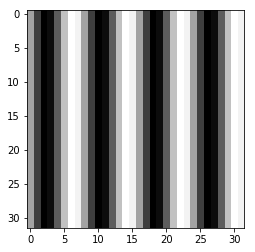

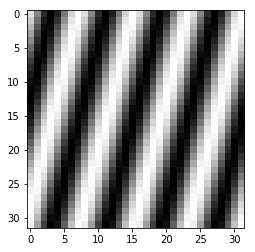

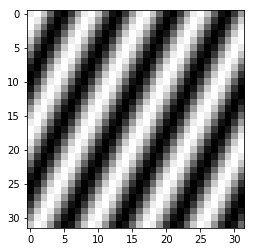

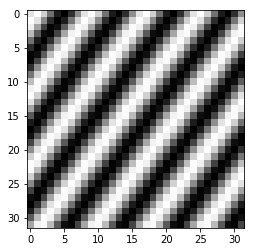

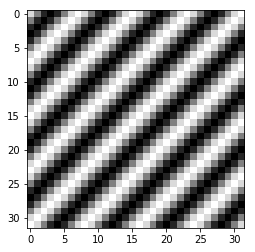

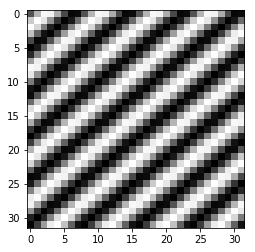

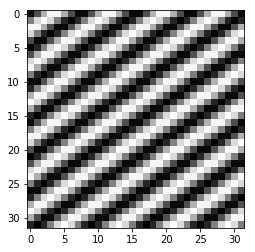

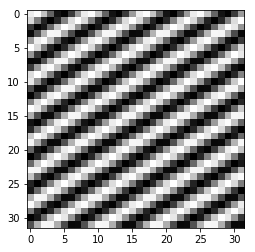

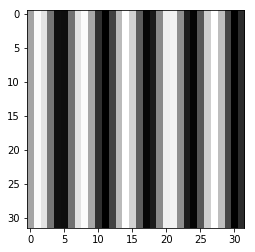

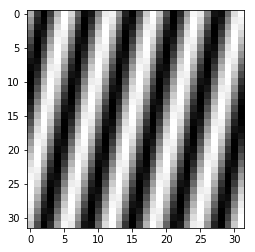

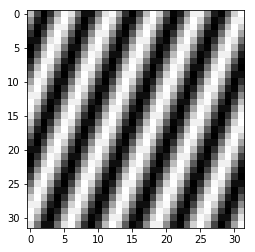

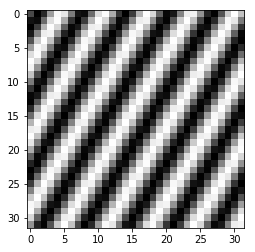

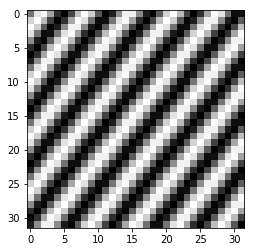

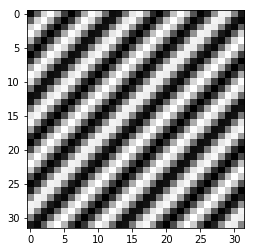

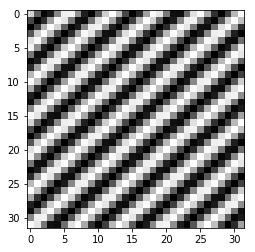

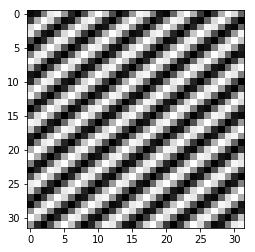

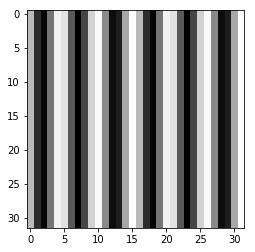

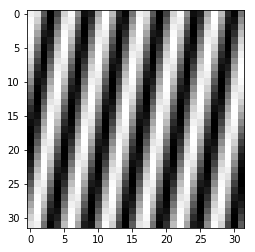

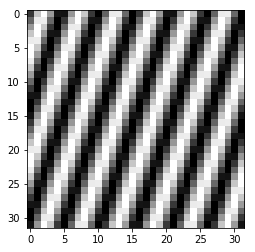

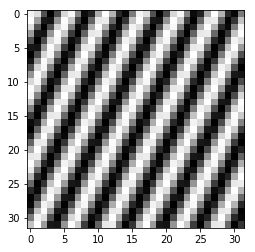

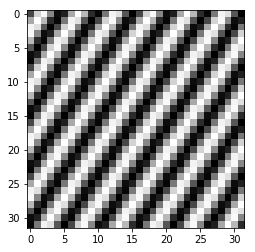

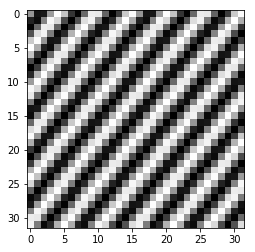

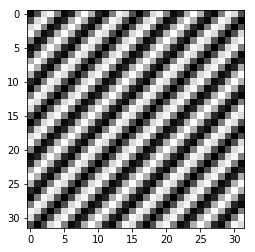

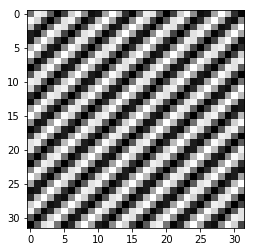

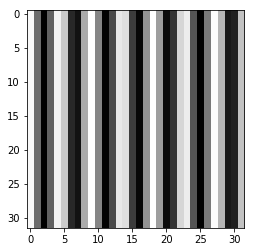

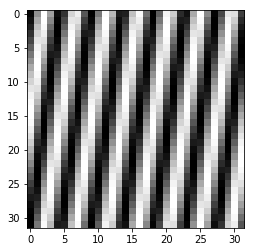

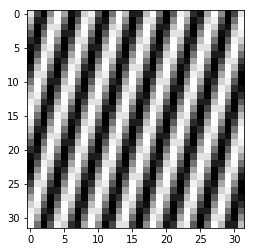

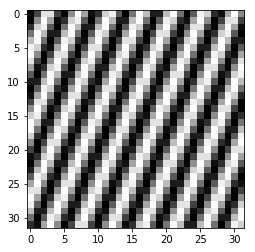

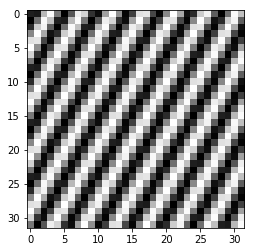

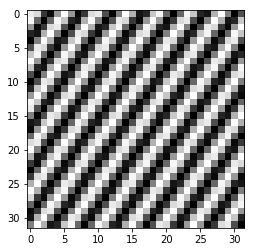

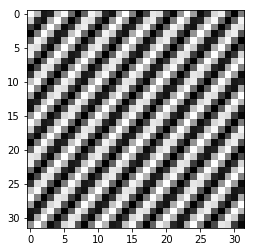

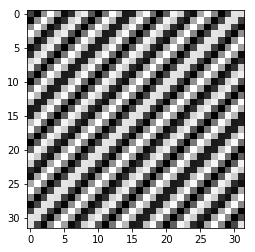

array([[0.99475774, 0.95729666, 0.90635271, ..., 0.95532329, 0.96466446,
        0.99086007],
       [1.00686992, 0.95982932, 0.89812392, ..., 0.95704639, 0.97590934,
        1.00742449],
       [0.96517925, 0.89700172, 0.82347917, ..., 0.93819255, 0.96293086,
        0.98643601],
       ...,
       [0.95217038, 0.92012974, 0.84793273, ..., 0.92527774, 0.92567389,
        0.94348201],
       [0.93431161, 0.88935151, 0.81319272, ..., 0.9173113 , 0.91780607,
        0.93391185],
       [0.9537134 , 0.91052468, 0.84981069, ..., 0.93331893, 0.93604934,
        0.95440829]])

In [3]:
inverse_transform(img, 8, 8, True)

Ahora reconstruimos la imagen usando los primeros 64 y 256 coeficientes. Mostrando las dos imágenes de abajo.

/home/ericksav22/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


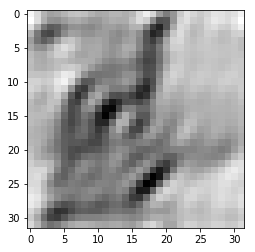

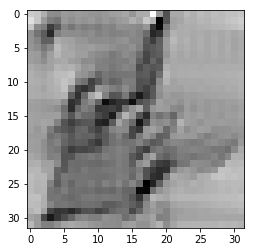

In [4]:
reconstructed_img_1 = inverse_transform(img, 8, 8)
reconstructed_img_2 = inverse_transform(img, 16, 16)
plt.imshow(reconstructed_img_1, cmap = "gray")
plt.show()
plt.imshow(reconstructed_img_2, cmap = "gray")
plt.show()

Por último mostramos la imagen reconstruida usando todos los coeficientes, quedando como resultado la original.

/home/ericksav22/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


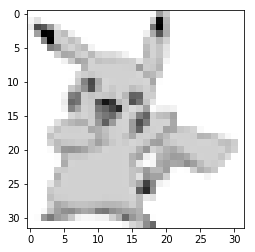

In [5]:
reconstructed_img = inverse_transform(img, 32, 32)
plt.imshow(reconstructed_img, cmap = "gray")